In [25]:
import radiant as rad
import numpy as np

In [26]:
def get_derivative_label(m):
    if m is None:
        return r"$\phi$"
    elif isinstance(m, int):
        subscript = str(m)
    else:
        subscript = ','.join([f"{i}" for i in m])
    return r"$\frac{\partial \phi}{\partial x_{" + subscript + r"}}$"

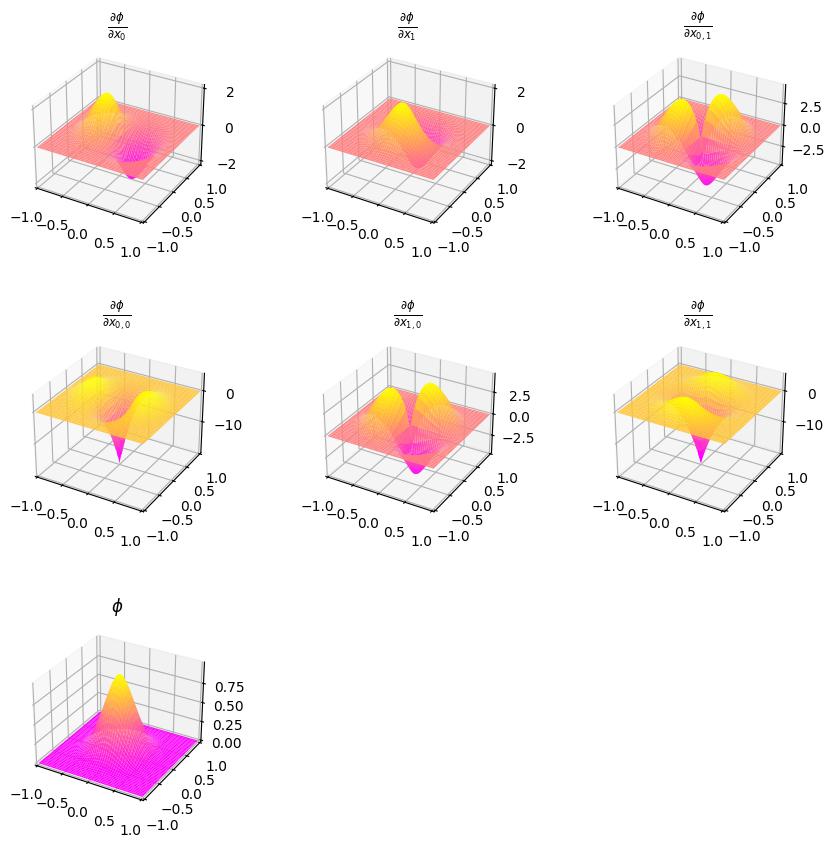

In [27]:
a = -1.
b = 1.

d = 2
k = 1
delta = 1.

ranges = ((a, b),) * d
xc = rad.gridn(((0., 1.),) * d, 1, flat=True)
phi = rad.Wendland(d, k)

funcs = [lambda *x, m=i: np.sum(phi(delta, *x, *xc, m=m), axis=0) for i in phi.allowed_derivatives]

rad.plot.spread(
    ranges,
    *funcs,
    n=1000,
    ncols=3,
    wspace=0.5,
    hspace=0.5,
    titles=[get_derivative_label(m) for m in phi.allowed_derivatives],
    figsize=(10, 10)
)